In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd 
train=pd.read_csv('gdrive/My Drive/predict the happiness/train.csv')

In [3]:
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [0]:
 test=pd.read_csv('gdrive/My Drive/predict the happiness/test.csv')

In [5]:
test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [0]:
train["Type"] = "train"
test["Type"] = "test"

In [0]:
test1 = test.copy()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:

data = pd.concat([train,test],ignore_index=True)

In [10]:
data.head()

,Browser_Used,Description,Device_Used,Is_Response,Type,User_ID
0,Edge,The room was kind of clean but had a VERY stro...,Mobile,not happy,train,id10326
1,Internet Explorer,I stayed at the Crown Plaza April -- - April -...,Mobile,not happy,train,id10327
2,Mozilla,I booked this hotel through Hotwire at the low...,Tablet,not happy,train,id10328
3,InternetExplorer,Stayed here with husband and sons on the way t...,Desktop,happy,train,id10329
4,Edge,My girlfriends and I stayed here to celebrate ...,Tablet,not happy,train,id10330


In [11]:
data.isnull().sum()

Browser_Used        0
Description         0
Device_Used         0
Is_Response     29404
Type                0
User_ID             0
dtype: int64

In [12]:
data.columns

Index(['Browser_Used', 'Description', 'Device_Used', 'Is_Response', 'Type',
       'User_ID'],
      dtype='object')

In [13]:
attributes = ['Browser_Used', 'Device_Used', 'User_ID']

for attribute in attributes:
    print(data[attribute].value_counts())

Firefox              13043
Edge                 12437
InternetExplorer      8191
Google Chrome         8050
Mozilla Firefox       7526
Mozilla               5425
Chrome                4356
IE                    4270
Internet Explorer     3700
Safari                 670
Opera                  668
Name: Browser_Used, dtype: int64
Desktop    26375
Mobile     26214
Tablet     15747
Name: Device_Used, dtype: int64
id109217    1
id10728     1
id14237     1
id24946     1
id30433     1
id12819     1
id102064    1
id104028    1
id17841     1
id44234     1
id34237     1
id18336     1
id93815     1
id32797     1
id31315     1
id97372     1
id17326     1
id99110     1
id24350     1
id87242     1
id22379     1
id13615     1
id94854     1
id35163     1
id83162     1
id88551     1
id22040     1
id16227     1
id35649     1
id39249     1
           ..
id95188     1
id100043    1
id19997     1
id39860     1
id47741     1
id13292     1
id96721     1
id43482     1
id33143     1
id104061    1
id81319     1

In [0]:
data["text length"] = data["Description"].apply(lambda x:len(x.split()))

In [15]:
data.head()

,Browser_Used,Description,Device_Used,Is_Response,Type,User_ID,text length
0,Edge,The room was kind of clean but had a VERY stro...,Mobile,not happy,train,id10326,46
1,Internet Explorer,I stayed at the Crown Plaza April -- - April -...,Mobile,not happy,train,id10327,208
2,Mozilla,I booked this hotel through Hotwire at the low...,Tablet,not happy,train,id10328,232
3,InternetExplorer,Stayed here with husband and sons on the way t...,Desktop,happy,train,id10329,93
4,Edge,My girlfriends and I stayed here to celebrate ...,Tablet,not happy,train,id10330,297


In [16]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 6 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
Type            38932 non-null object
dtypes: object(6)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 5 columns):
User_ID         29404 non-null object
Description     29404 non-null object
Browser_Used    29404 non-null object
Device_Used     29404 non-null object
Type            29404 non-null object
dtypes: object(5)
memory usage: 1.1+ MB
None


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


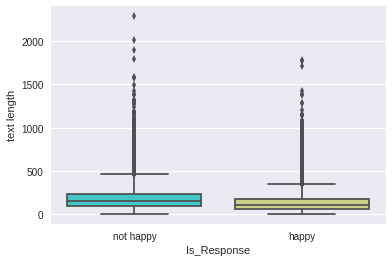

In [17]:
sns.boxplot(y=data["text length"][:38932],x=data["Is_Response"][:38932],palette="rainbow")

In [0]:
train["text length"] = train["Description"].apply(lambda x:len(x.split()))

In [0]:
# sns.catplot(x=train["Device_Used"],y=train["text length"],hue=train["Is_Response"],kind="swarm")
# sns.catplot(x="Device_Used",y="text length",hue="Is_Response",data=train)

In [0]:
data["Browser_Used"] = data["Browser_Used"].replace({
    "Mozilla":"Firefox",
    "Mozilla Firefox":"Firefox",
    "Google Chrome":"Chrome",
    "InternetExplorer":"IE",
    "Internet Explorer":"IE"
})

In [21]:
data["Browser_Used"].unique()

array(['Edge', 'IE', 'Firefox', 'Chrome', 'Opera', 'Safari'], dtype=object)

In [0]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['Browser_Used', 'Device_Used']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [0]:
data = pd.get_dummies(data,columns=['Browser_Used', 'Device_Used'])

In [0]:
data["Is_Response"] = data["Is_Response"].map({"happy":1 , "not happy":0})

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer="word",ngram_range = (1,1), min_df=150)
# , max_features=500

In [0]:
X = cv.fit_transform(data["Description"])

In [27]:
X.shape

(68336, 3226)

In [0]:
count_vect_df = pd.DataFrame(X.todense(),columns=cv.get_feature_names())

In [0]:
data.drop(["User_ID","text length","Description"],axis=1,inplace=True)

In [0]:
# data["Description"] = list(X.A)
df = pd.concat([data, count_vect_df], axis=1)

In [31]:
df.head()

,Is_Response,Type,Browser_Used_0,Browser_Used_1,Browser_Used_2,Browser_Used_3,Browser_Used_4,Browser_Used_5,Device_Used_0,Device_Used_1,...,yorker,you,young,younger,your,yourself,yr,yummy,zero,zoo
0,0.0,train,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0.0,train,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,train,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,train,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,train,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
df.columns

Index(['Is_Response', 'Type', 'Browser_Used_0', 'Browser_Used_1',
       'Browser_Used_2', 'Browser_Used_3', 'Browser_Used_4', 'Browser_Used_5',
       'Device_Used_0', 'Device_Used_1',
       ...
       'yorker', 'you', 'young', 'younger', 'your', 'yourself', 'yr', 'yummy',
       'zero', 'zoo'],
      dtype='object', length=3237)

In [0]:
df1 = df.copy()
df1.drop(["Is_Response"],axis=1,inplace=True)

In [0]:
XCols = df1.columns

YCols = ['Is_Response']

In [35]:
XX = df.loc[df["Type"]=="train",XCols]
yy = df.loc[df["Type"]=="train",YCols]

print(XX.shape)
print(yy.shape)
XX.head()

(38932, 3236)
(38932, 1)


,Type,Browser_Used_0,Browser_Used_1,Browser_Used_2,Browser_Used_3,Browser_Used_4,Browser_Used_5,Device_Used_0,Device_Used_1,Device_Used_2,...,yorker,you,young,younger,your,yourself,yr,yummy,zero,zoo
0,train,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,train,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,train,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,train,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,train,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [0]:
XX.drop(["Type"],axis=1,inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=101)

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [39]:
nb.fit(XX_train,yy_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predict = nb.predict(XX_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yy_test,predict))

0.8620719178082191


In [42]:
Predict_Happiness = df.loc[df["Type"]=="test",XCols]
Predict_Happiness.head()


,Type,Browser_Used_0,Browser_Used_1,Browser_Used_2,Browser_Used_3,Browser_Used_4,Browser_Used_5,Device_Used_0,Device_Used_1,Device_Used_2,...,yorker,you,young,younger,your,yourself,yr,yummy,zero,zoo
38932,test,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38933,test,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38934,test,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38935,test,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38936,test,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [0]:
Predict_Happiness.drop(["Type"],axis=1,inplace=True)

In [0]:
Final_prediction = nb.predict(Predict_Happiness)

In [0]:
Data_Predicted = test.copy()

In [46]:
Data_Predicted.head()

,User_ID,Description,Browser_Used,Device_Used,Type
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,test
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop,test
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,test
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,test
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,test


In [0]:
Data_Predicted.drop(["Description","Browser_Used","Device_Used","Type"],axis=1,inplace=True)

In [0]:
Data_Predicted["Is_Response"] = pd.Series(Final_prediction)

In [49]:
Data_Predicted["Is_Response"].unique()

array([0., 1.])

In [50]:
Data_Predicted["Is_Response"].value_counts()

1.0    20437
0.0     8967
Name: Is_Response, dtype: int64

In [0]:
Data_Predicted["Is_Response"] = Data_Predicted["Is_Response"].map({1.0:"happy",0.0:"not_happy"})

In [52]:
Data_Predicted.head()

,User_ID,Is_Response
0,id80132,not_happy
1,id80133,happy
2,id80134,not_happy
3,id80135,not_happy
4,id80136,happy


In [0]:
Data_Predicted.to_csv("gdrive/My Drive/predict the happiness/Sample_Submission_NB.csv", index=False)

In [0]:
# XGBoost

In [0]:
# import xgboost
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier()

In [57]:
xgb.fit(XX_train,yy_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
xgb_predict = xgb.predict(XX_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [60]:
print(accuracy_score(yy_test,xgb_predict))

0.8502568493150685
